# Problem 2 : Auditing Differential Privacy (Implementation)

In [5]:
import numpy as np
from scipy.stats import norm, binom
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Function to generate canaries
def generate_canaries(m, d):
    """
    Generates m canary points uniformly sampled from the unit sphere in R^d.
    """
    canaries = np.random.randn(m, d)
    canaries /= np.linalg.norm(canaries, axis=1, keepdims=True)
    return canaries

# Function to run the DP algorithm using the Gaussian mechanism
def dp_gaussian_mechanism(D, sigma, d):
    """
    Runs the Gaussian mechanism on dataset D.
    Adds Gaussian noise with standard deviation sigma to the sum of D.
    """
    sum_D = np.sum(D, axis=0)
    noise = np.random.normal(0, sigma, size=d)
    return sum_D + noise

# Function to compute membership scores
def compute_scores(theta, D_canary):
    """
    Computes membership scores for each canary point.
    """
    return np.dot(D_canary, theta)

In [6]:
def compute_empirical_epsilon(m1, m2, scores, S):
    """
    Computes the empirical lower bound on epsilon using binary search.
    """
    # Sort scores and assign positive/negative guesses based on scores
    sorted_indices = np.argsort(scores)
    T = np.zeros_like(scores, dtype=int)

    # Assign +1 to the top m1 scores (guess members)
    T[sorted_indices[-m1:]] = 1

    # Assign -1 to the bottom m2 scores (guess non-members)
    T[sorted_indices[:m2]] = -1

    # Calculate the number of correct guesses
    N_correct = np.sum(S == T)
    N_total = m1 + m2

    # Define the function to solve for epsilon
    def binom_prob(epsilon):
        p = np.exp(epsilon) / (1 + np.exp(epsilon))
        return binom.cdf(N_correct, N_total, p) - 0.95

    # Use numerical optimization to find the smallest epsilon satisfying the condition
    epsilon_lower_bound = brentq(binom_prob, 0, 20)  # Adjust the range if needed
    return epsilon_lower_bound

In [7]:
def simulate_varying_epsilon(d, m, epsilons, delta=1e-6):
    """
    Simulates and plots empirical lower bound vs. theoretical upper bound for varying epsilon.
    """
    empirical_epsilons = []
    for epsilon in epsilons:
        sigma = np.sqrt(2 * np.log(1.25 / delta)) / epsilon
        D = np.zeros((1, d))  # The dataset containing a single zero vector
        D_canary = generate_canaries(m, d)
        S = np.random.choice([-1, 1], size=m)

        # Run DP algorithm with positive canaries
        theta = dp_gaussian_mechanism(D + D_canary[S == 1], sigma, d)

        # Compute membership scores
        scores = compute_scores(theta, D_canary)

        # Calculate the empirical epsilon
        m1 = m2 = min(m // 2, 500)
        empirical_epsilon = compute_empirical_epsilon(m1, m2, scores, S)
        empirical_epsilons.append(empirical_epsilon)

    # Plot results
    plt.plot(epsilons, empirical_epsilons, label='Empirical Lower Bound')
    plt.plot(epsilons, epsilons, label='Theoretical Upper Bound', linestyle='--')
    plt.xlabel('Theoretical Epsilon')
    plt.ylabel('Empirical Epsilon')
    plt.title(f'Empirical vs. Theoretical Epsilon for d={d}, m={m}')
    plt.legend()
    plt.grid(True)
    plt.show()

def simulate_varying_m(d, sigma, m_values):
    """
    Simulates and plots empirical lower bound vs. m.
    """
    empirical_epsilons = []
    for m in m_values:
        D = np.zeros((1, d))
        D_canary = generate_canaries(m, d)
        S = np.random.choice([-1, 1], size=m)

        theta = dp_gaussian_mechanism(D + D_canary[S == 1], sigma, d)
        scores = compute_scores(theta, D_canary)

        m1 = m2 = min(m // 2, 500)
        empirical_epsilon = compute_empirical_epsilon(m1, m2, scores, S)
        empirical_epsilons.append(empirical_epsilon)

    # Plot results
    plt.plot(m_values, empirical_epsilons, label='Empirical Lower Bound')
    plt.xscale('log')
    plt.xlabel('Number of Canaries (m)')
    plt.ylabel('Empirical Epsilon')
    plt.title(f'Empirical Epsilon vs. m for d={d}')
    plt.legend()
    plt.grid(True)
    plt.show()

def simulate_varying_d(m, sigma, d_values):
    """
    Simulates and plots empirical lower bound vs. d.
    """
    empirical_epsilons = []
    for d in d_values:
        D = np.zeros((1, d))
        D_canary = generate_canaries(m, d)
        S = np.random.choice([-1, 1], size=m)

        theta = dp_gaussian_mechanism(D + D_canary[S == 1], sigma, d)
        scores = compute_scores(theta, D_canary)

        m1 = m2 = min(m // 2, 500)
        empirical_epsilon = compute_empirical_epsilon(m1, m2, scores, S)
        empirical_epsilons.append(empirical_epsilon)

    # Plot results
    plt.plot(d_values, empirical_epsilons, label='Empirical Lower Bound')
    plt.xscale('log')
    plt.xlabel('Dimension (d)')
    plt.ylabel('Empirical Epsilon')
    plt.title(f'Empirical Epsilon vs. d for m={m}')
    plt.legend()
    plt.grid(True)
    plt.show()

Running simulation for varying epsilon...


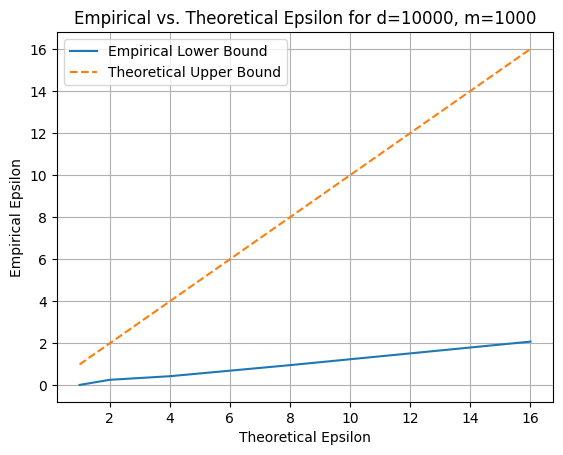

Running simulation for varying number of canaries m...


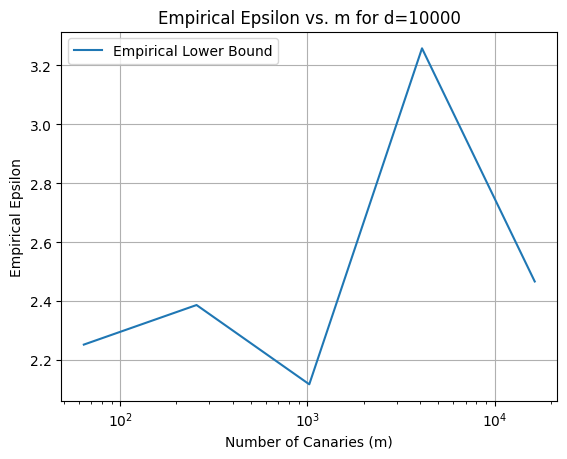

Running simulation for varying dimension d...


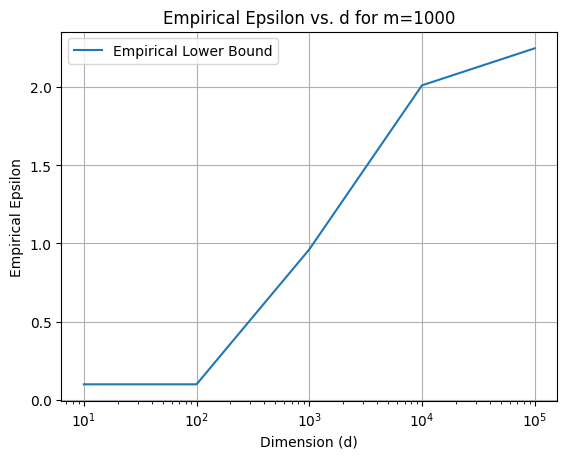

All simulations complete.


In [8]:
def main():
    # Parameters for simulations
    d = 10**4          # Fixed dimension for Q 2.1 and Q 2.2
    m = 1000           # Fixed number of canaries for Q 2.1 and Q 2.3
    delta = 1e-6       # Fixed delta for Gaussian mechanism

    # 1. Vary epsilon (Q 2.1)
    epsilons = [1, 2, 4, 8, 16]
    print("Running simulation for varying epsilon...")
    simulate_varying_epsilon(d=d, m=m, epsilons=epsilons, delta=delta)

    # 2. Vary number of canaries m (Q 2.2)
    sigma = np.sqrt(2 * np.log(1.25 / delta)) / 16  # Fixed sigma for ε=16 in this example
    m_values = [2**6, 2**8, 2**10, 2**12, 2**14]  # Logarithmically spaced values of m
    print("Running simulation for varying number of canaries m...")
    simulate_varying_m(d=d, sigma=sigma, m_values=m_values)

    # 3. Vary dimension d (Q 2.3)
    d_values = [10, 100, 1000, 10**4, 10**5]  # Logarithmically spaced dimensions
    print("Running simulation for varying dimension d...")
    simulate_varying_d(m=m, sigma=sigma, d_values=d_values)

    print("All simulations complete.")

if __name__ == "__main__":
    main()